In [1]:
import os
import torch
import pandas as pd
import numpy as np

%config InlineBackend.figure_format='retina'
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from analysis_steps import make_run_overview_df

In [2]:
CODE_DIR = "/home/cbarkhof/fall-2021"
ANALYSIS_DIR = f"{CODE_DIR}/analysis/analysis-files"
CHECKPOINT_DIR = f"{CODE_DIR}/run_files/checkpoints"

SAMPLE_FILE = f"generative-samples.pt"
CONDITIONAL_SAMPLE_FILE = f"generative-conditional-samples.pt"

SURPRISAL_SAMPLE_FILE = "surprisal_sample.pt"
SURPRISAL_DATA_FILE = "surprisal_data.pt"
SURPRISAL_COND_SAMPLE_FILE = "surprisal_conditional_sample.pt"

TEST_VALID_EVAL_FILE = "test-valid-results.pt"

BASE_ALPHA = 0.001
MMD_REDO_FILE = f"mmd_redo-base-alpha-{BASE_ALPHA}.pt"

In [3]:
prefixes = ["(29-nov ptb-beta-vae)", "(29-nov yahoo-beta-vae)", "(29-nov drop yahoo-beta-vae)"]
overview_df = make_run_overview_df(prefixes, add_data_group=False)
overview_df

,objective,dataset,l_rate,dropout,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
yahoo_answer | drop-0.25 | BETA-VAE beta 0.5 dec: Strong roBERTa,BETA-VAE,yahoo_answer,0,0.250000,0.500000,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.5] | ST...
yahoo_answer | drop-1 | BETA-VAE beta 0.1 dec: Strong roBERTa,BETA-VAE,yahoo_answer,0,1,0.100000,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.1] | ST...
yahoo_answer | drop-0.75 | BETA-VAE beta 0.1 dec: Strong roBERTa,BETA-VAE,yahoo_answer,0,0.750000,0.100000,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.1] | ST...
yahoo_answer | drop-0.5 | BETA-VAE beta 0.1 dec: Strong roBERTa,BETA-VAE,yahoo_answer,0,0.500000,0.100000,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.1] | ST...
yahoo_answer | drop-0.25 | BETA-VAE beta 0.1 dec: Strong roBERTa,BETA-VAE,yahoo_answer,0,0.250000,0.100000,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.1] | ST...
yahoo_answer | drop-1 | BETA-VAE beta 0 dec: Strong roBERTa,BETA-VAE,yahoo_answer,0,1,0,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.0] | ST...
yahoo_answer | drop-0.75 | BETA-VAE beta 0 dec: Strong roBERTa,BETA-VAE,yahoo_answer,0,0.750000,0,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.0] | ST...
yahoo_answer | drop-0.5 | BETA-VAE beta 0 dec: Strong roBERTa,BETA-VAE,yahoo_answer,0,0.500000,0,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.0] | ST...
yahoo_answer | drop-0.25 | BETA-VAE beta 0 dec: Strong roBERTa,BETA-VAE,yahoo_answer,0,0.250000,0,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.0] | ST...
yahoo_answer | drop-1 | BETA-VAE beta 1 dec: Strong roBERTa,BETA-VAE,yahoo_answer,0,1,1,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=1.0] | ST...


In [21]:
all_stats = dict()

run_names = list(overview_df["run_name"].values) # + ["data_group"]

for i, run_name in enumerate(run_names):
    save_dir = f"{ANALYSIS_DIR}/{run_name}"

    # skip things that are not directories
    if os.path.isfile(save_dir):
        continue
        
    print(i, run_name)

    all_stats[run_name] = dict()           

    # TEST / VALID SIMPLE EVAL
    if os.path.isfile(f"{save_dir}/{TEST_VALID_EVAL_FILE}"):
        d = torch.load(f"{save_dir}/{TEST_VALID_EVAL_FILE}")
        for phase in ["test", "valid"]:
            for k, v in d[phase].items():
                # if type(v) != float: print("Warning none float value for k", k, type(v), v)
                if " mean" in k: #  or k == "MMD"
                    all_stats[run_name][phase+"-"+k] = v
    
    # CONDITIONAL SAMPLE SURPRISAL
#     if os.path.isfile(f"{save_dir}/{SURPRISAL_COND_SAMPLE_FILE}"):
#         d = torch.load(f"{save_dir}/{SURPRISAL_COND_SAMPLE_FILE}")
#         for phase in ["test", "valid", "train"]:
#             all_stats[run_name]["cond. samples" + phase+"-"+"iw_ll"] = d[phase]["iw_ll_mean"]
            
#     # DATA SURPRISAL
#     if os.path.isfile(f"{save_dir}/{SURPRISAL_DATA_FILE}"):
#         d = torch.load(f"{save_dir}/{SURPRISAL_DATA_FILE}")
#         for phase in ["test", "valid", "train"]:
#             print(d[phase])
#             all_stats[run_name]["data" + phase+"-"+"iw_ll"] = d[phase]["iw_ll_mean"]
    
#     # GEN. SAMPLE SURPRISAL
#     if os.path.isfile(f"{save_dir}/{SURPRISAL_COND_SAMPLE_FILE}"):
#         d = torch.load(f"{save_dir}/{SURPRISAL_COND_SAMPLE_FILE}")
#         all_stats[run_name]["gen. samples -"+"iw_ll"] = d["iw_ll_mean"]
        
    
    # Add MMD stats
    if os.path.isfile(f"{save_dir}/{MMD_REDO_FILE}"):
        d = torch.load(f"{save_dir}/{MMD_REDO_FILE}")
        for phase in ["test", "valid"]:
            all_stats[run_name][phase+"-"+"MMD"] = d[phase]

0 (29-nov drop yahoo-beta-vae) B-VAE[b=0.5] | STRONG | Nz=128 | drop=0.25
1 (29-nov drop yahoo-beta-vae) B-VAE[b=0.1] | STRONG | Nz=128 | drop=1.0
2 (29-nov drop yahoo-beta-vae) B-VAE[b=0.1] | STRONG | Nz=128 | drop=0.75
3 (29-nov drop yahoo-beta-vae) B-VAE[b=0.1] | STRONG | Nz=128 | drop=0.5
4 (29-nov drop yahoo-beta-vae) B-VAE[b=0.1] | STRONG | Nz=128 | drop=0.25
5 (29-nov drop yahoo-beta-vae) B-VAE[b=0.0] | STRONG | Nz=128 | drop=1.0
6 (29-nov drop yahoo-beta-vae) B-VAE[b=0.0] | STRONG | Nz=128 | drop=0.75
7 (29-nov drop yahoo-beta-vae) B-VAE[b=0.0] | STRONG | Nz=128 | drop=0.5
8 (29-nov drop yahoo-beta-vae) B-VAE[b=0.0] | STRONG | Nz=128 | drop=0.25
9 (29-nov drop yahoo-beta-vae) B-VAE[b=1.0] | STRONG | Nz=128 | drop=1.0
10 (29-nov drop yahoo-beta-vae) B-VAE[b=1.0] | STRONG | Nz=128 | drop=0.75
11 (29-nov drop yahoo-beta-vae) B-VAE[b=1.0] | STRONG | Nz=128 | drop=0.5
12 (29-nov drop yahoo-beta-vae) B-VAE[b=1.0] | STRONG | Nz=128 | drop=0.25
13 (29-nov drop yahoo-beta-vae) B-VAE[b=0

In [22]:
import pandas as pd

df_stats = pd.DataFrame(all_stats).transpose()
df_all = pd.merge(df_stats, overview_df, left_index=True, right_on='run_name')
print(df_all.columns)
df_all

Index(['test-elbo mean', 'test-distortion mean', 'test-kl_prior_post mean',
       'test-mean_mean mean', 'test-std_across_x_mean mean',
       'test-std_across_z_mean mean', 'test-mean_scale mean',
       'test-std_across_x_scale mean', 'test-std_across_z_scale mean',
       'valid-elbo mean', 'valid-distortion mean', 'valid-kl_prior_post mean',
       'valid-mean_mean mean', 'valid-std_across_x_mean mean',
       'valid-std_across_z_mean mean', 'valid-mean_scale mean',
       'valid-std_across_x_scale mean', 'valid-std_across_z_scale mean',
       'test-MMD', 'valid-MMD', 'objective', 'dataset', 'l_rate', 'dropout',
       'beta_beta', 'free_bits', 'mdr_value', 'l_mmd', 'decoder', 'run_name'],
      dtype='object')


,test-elbo mean,test-distortion mean,test-kl_prior_post mean,test-mean_mean mean,test-std_across_x_mean mean,test-std_across_z_mean mean,test-mean_scale mean,test-std_across_x_scale mean,test-std_across_z_scale mean,valid-elbo mean,...,objective,dataset,l_rate,dropout,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
yahoo_answer | drop-0.25 | BETA-VAE beta 0.5 dec: Strong roBERTa,-165.282320,154.807616,10.474704,-0.001620,0.311777,0.344641,0.926543,0.039551,0.095059,-166.730626,...,BETA-VAE,yahoo_answer,0,0.250000,0.500000,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.5] | ST...
yahoo_answer | drop-1 | BETA-VAE beta 0.1 dec: Strong roBERTa,-309.211181,259.142093,50.069087,-0.003267,0.484171,0.575664,0.775618,0.052900,0.262920,-316.680967,...,BETA-VAE,yahoo_answer,0,1,0.100000,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.1] | ST...
yahoo_answer | drop-0.75 | BETA-VAE beta 0.1 dec: Strong roBERTa,-238.876425,151.698767,87.177658,-0.001206,0.752774,0.781398,0.563893,0.104936,0.207212,-241.903948,...,BETA-VAE,yahoo_answer,0,0.750000,0.100000,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.1] | ST...
yahoo_answer | drop-0.5 | BETA-VAE beta 0.1 dec: Strong roBERTa,-234.235066,139.877291,94.357774,0.013324,0.771177,0.793538,0.517154,0.118846,0.183451,-236.494894,...,BETA-VAE,yahoo_answer,0,0.500000,0.100000,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.1] | ST...
yahoo_answer | drop-0.25 | BETA-VAE beta 0.1 dec: Strong roBERTa,-226.373271,132.646535,93.726736,-0.003761,0.781383,0.800084,0.512682,0.121733,0.165301,-228.482411,...,BETA-VAE,yahoo_answer,0,0.250000,0.100000,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.1] | ST...
yahoo_answer | drop-1 | BETA-VAE beta 0 dec: Strong roBERTa,-683.209231,269.505616,413.703620,0.022900,0.713500,1.122929,0.058790,0.047205,0.028652,-694.567478,...,BETA-VAE,yahoo_answer,0,1,0,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.0] | ST...
yahoo_answer | drop-0.75 | BETA-VAE beta 0 dec: Strong roBERTa,-853.784993,145.863412,707.921578,-0.006777,0.642336,0.759117,0.006153,0.012335,0.002338,-858.178290,...,BETA-VAE,yahoo_answer,0,0.750000,0,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.0] | ST...
yahoo_answer | drop-0.5 | BETA-VAE beta 0 dec: Strong roBERTa,-844.463892,130.891193,713.572699,-0.026702,0.593495,0.699087,0.005215,0.007698,0.001975,-844.620696,...,BETA-VAE,yahoo_answer,0,0.500000,0,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.0] | ST...
yahoo_answer | drop-0.25 | BETA-VAE beta 0 dec: Strong roBERTa,-804.290877,120.063850,684.227026,-0.022496,0.582884,0.717599,0.005843,0.007097,0.002305,-803.367884,...,BETA-VAE,yahoo_answer,0,0.250000,0,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=0.0] | ST...
yahoo_answer | drop-1 | BETA-VAE beta 1 dec: Strong roBERTa,-276.988294,273.921979,3.066319,0.000676,0.040037,0.123872,0.990814,0.014246,0.087515,-284.925277,...,BETA-VAE,yahoo_answer,0,1,1,0,0,0,strong_distil_roberta_decoder,(29-nov drop yahoo-beta-vae) B-VAE[b=1.0] | ST...


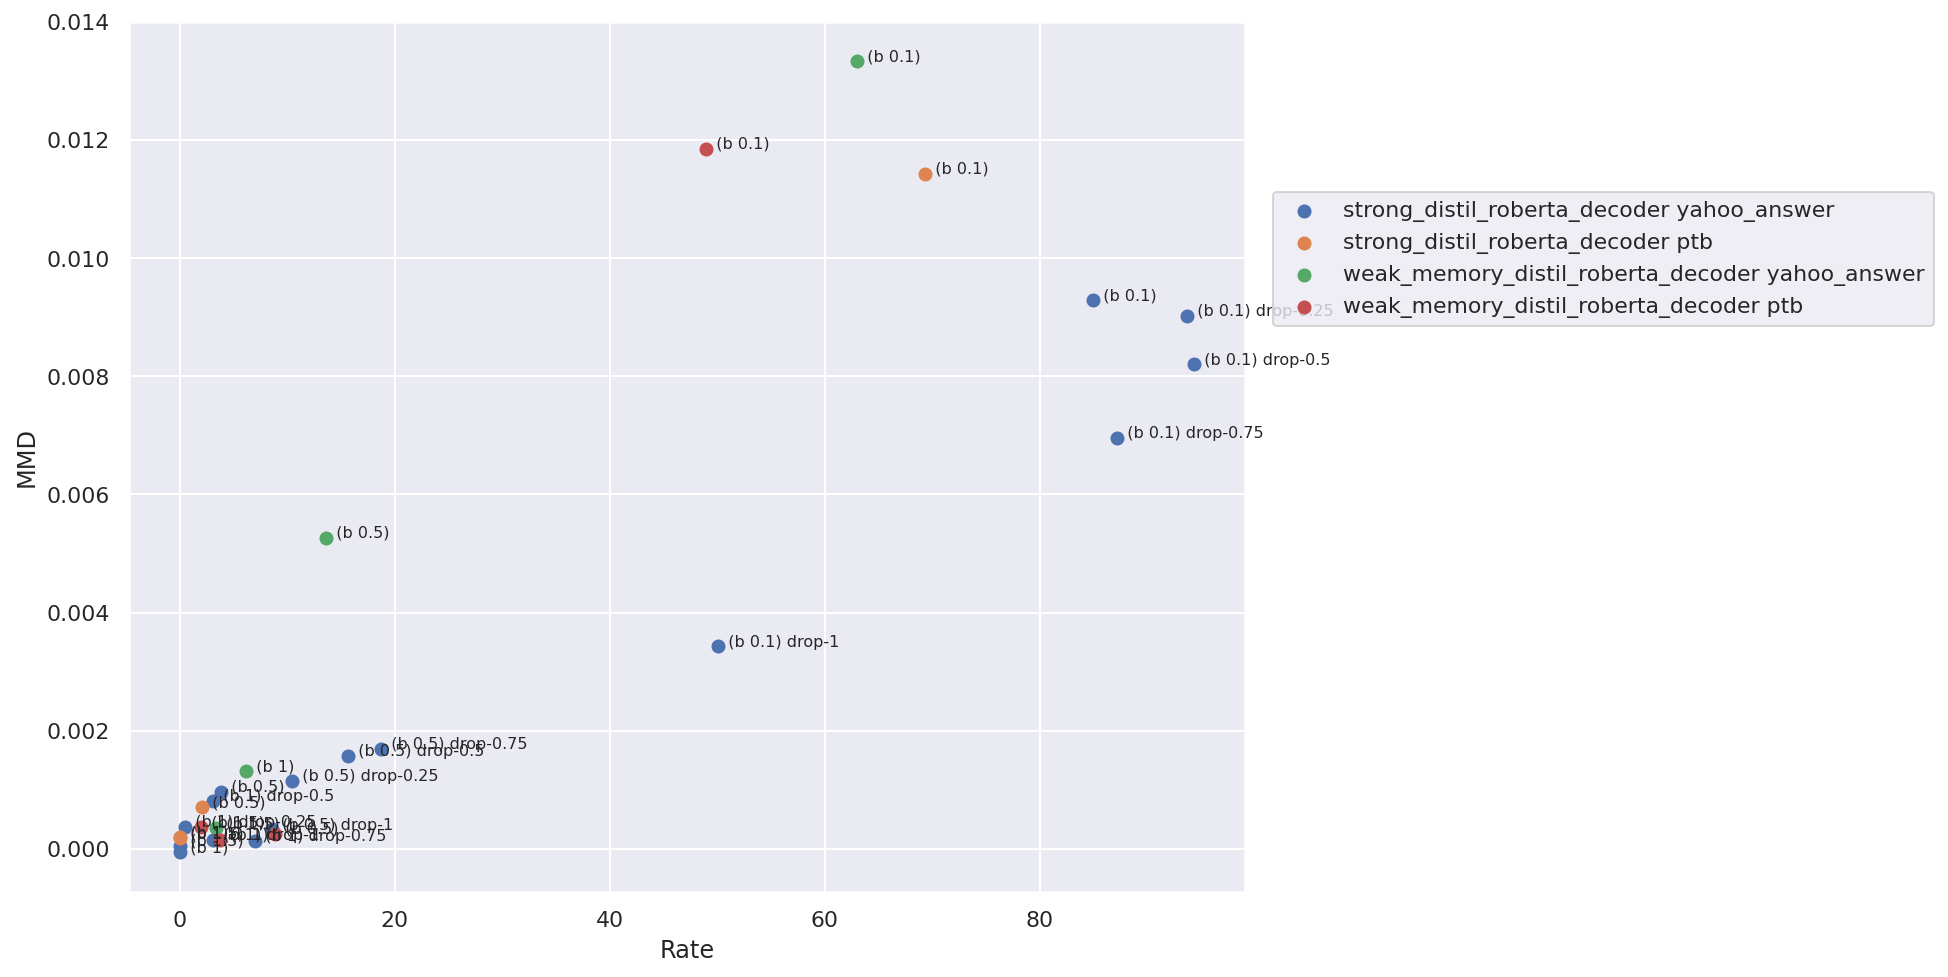

In [23]:
x_col = "test-kl_prior_post mean"
y_col = "test-MMD"

rate_lim = 200

df_select = df_all[df_all[x_col] < rate_lim]

fig, ax = plt.subplots(figsize=(10, 8))
for row, decoder in enumerate(df_select.decoder.unique()):
    for col, dataset in enumerate(df_select.dataset.unique()):
        select = df_select[(df_select["decoder"] == decoder) & (df_select["dataset"] == dataset)]
        ax.scatter(select[x_col].values, select[y_col].values, label=f"{decoder} {dataset}")

texts = []
for index, row in df_select.iterrows():
    x, y = row[x_col], row[y_col]
    drop = row["dropout"]

    if row["objective"] == "INFO-VAE":
        l_mmd = row["l_mmd"]
        l_rate = row["l_rate"]
        string = f"(  i {l_rate}, {l_mmd})"

    elif row["objective"] == "BETA-VAE":
        beta = row["beta_beta"]
        string = f"  (b {beta})"

    elif row["objective"] == "FB-VAE":
        fb = row["free_bits"]
        sring =  f"  (fb {fb})"

    elif row["objective"] == "MDR-VAE":
        mdr = row["mdr_value"]
        string = f"  (mdr {mdr})"
    
    if drop > 0:
        string += f" drop-{drop}"
        
    t = ax.text(x, y, string, size=8)

    texts.append(t)
        
plt.legend(loc=(1.025, 0.65))
plt.xlabel("Rate")
plt.ylabel("MMD")
plt.show()

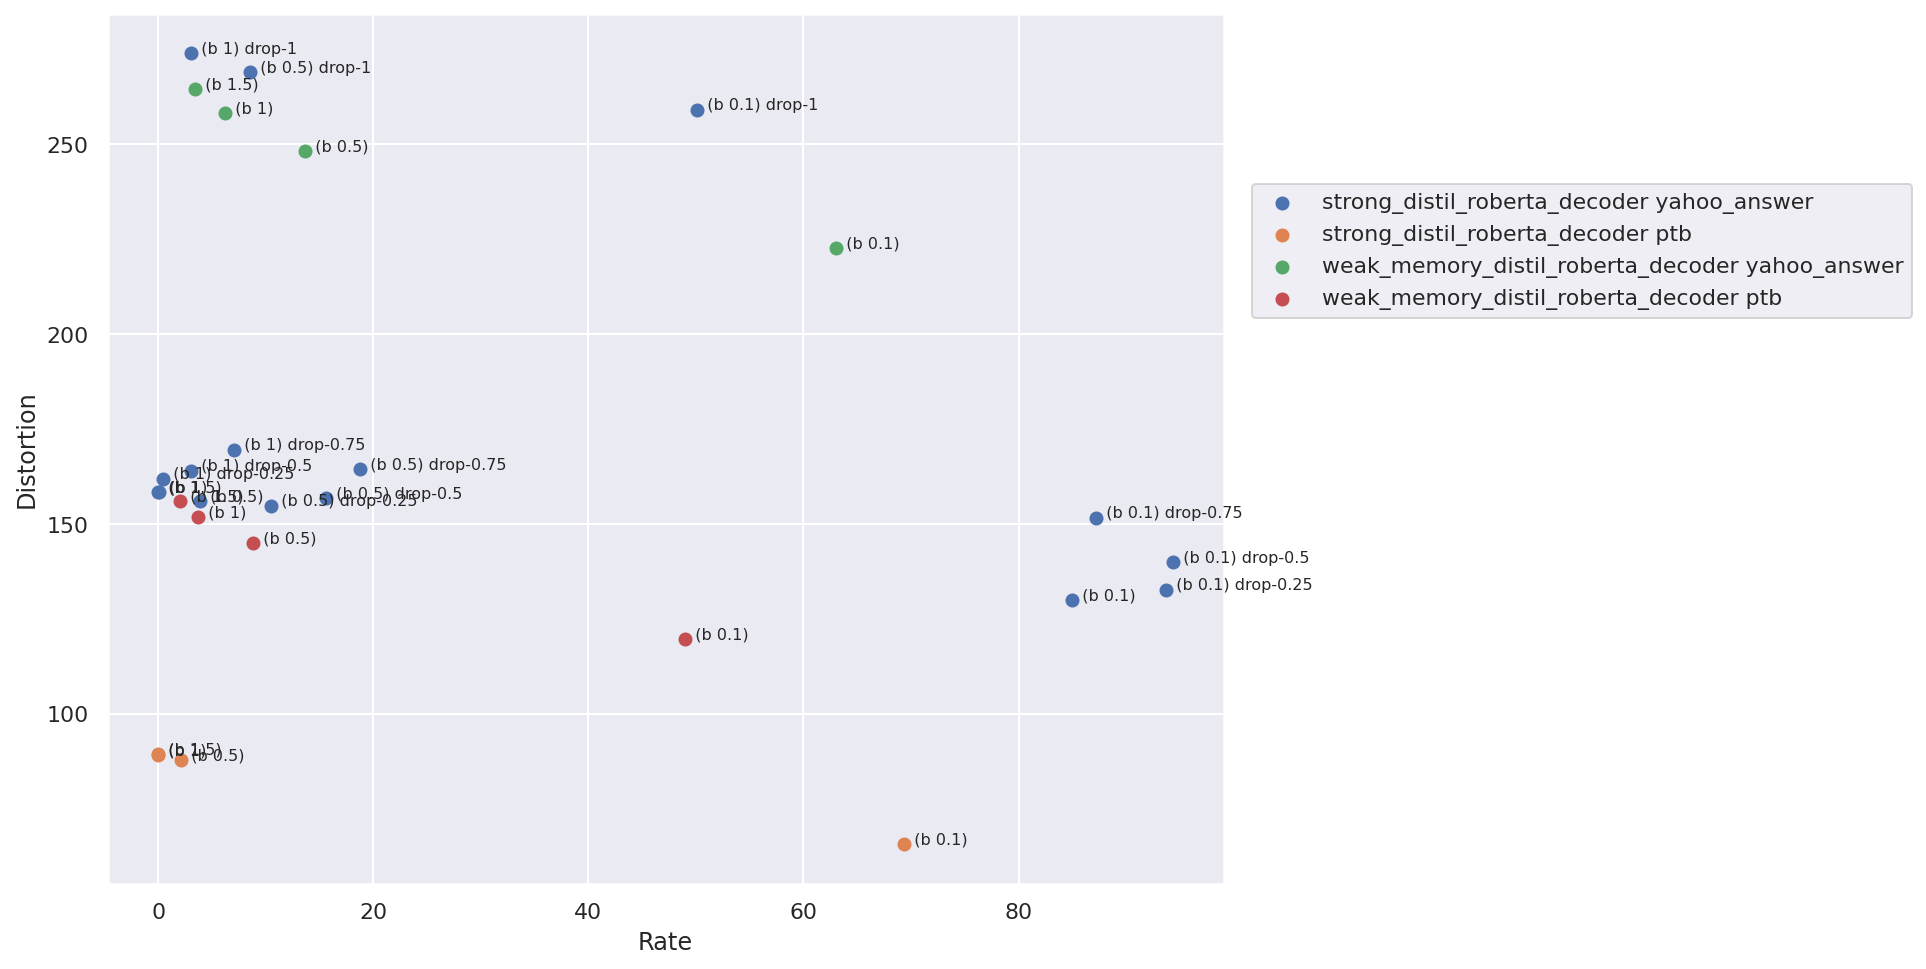

In [15]:
x_col = "test-kl_prior_post mean"
y_col = "test-distortion mean"

rate_lim = 200

df_select = df_all[df_all[x_col] < rate_lim]

fig, ax = plt.subplots(figsize=(10, 8))
for row, decoder in enumerate(df_select.decoder.unique()):
    for col, dataset in enumerate(df_select.dataset.unique()):
        select = df_select[(df_select["decoder"] == decoder) & (df_select["dataset"] == dataset)]
        ax.scatter(select[x_col].values, select[y_col].values, label=f"{decoder} {dataset}")

texts = []
for index, row in df_select.iterrows():
    x, y = row[x_col], row[y_col]
    drop = row["dropout"]

    if row["objective"] == "INFO-VAE":
        l_mmd = row["l_mmd"]
        l_rate = row["l_rate"]
        string = f"(  i {l_rate}, {l_mmd})"

    elif row["objective"] == "BETA-VAE":
        beta = row["beta_beta"]
        string = f"  (b {beta})"

    elif row["objective"] == "FB-VAE":
        fb = row["free_bits"]
        sring =  f"  (fb {fb})"

    elif row["objective"] == "MDR-VAE":
        mdr = row["mdr_value"]
        string = f"  (mdr {mdr})"
    
    if drop > 0:
        string += f" drop-{drop}"
        
    t = ax.text(x, y, string, size=8)

    texts.append(t)
        
plt.legend(loc=(1.025, 0.65))
plt.xlabel("Rate")
plt.ylabel("Distortion")
plt.show()

In [24]:
select_cols = ['test-elbo mean', 'test-distortion mean', 'test-kl_prior_post mean', 'test-MMD',
               'beta_beta', 'decoder', 'objective', 'dataset']
df_all[select_cols].sort_values(["decoder", "beta_beta"])

,test-elbo mean,test-distortion mean,test-kl_prior_post mean,test-MMD,beta_beta,decoder,objective,dataset
yahoo_answer | drop-1 | BETA-VAE beta 0 dec: Strong roBERTa,-683.209231,269.505616,413.703620,1.012404,0,strong_distil_roberta_decoder,BETA-VAE,yahoo_answer
yahoo_answer | drop-0.75 | BETA-VAE beta 0 dec: Strong roBERTa,-853.784993,145.863412,707.921578,0.320906,0,strong_distil_roberta_decoder,BETA-VAE,yahoo_answer
yahoo_answer | drop-0.5 | BETA-VAE beta 0 dec: Strong roBERTa,-844.463892,130.891193,713.572699,0.319541,0,strong_distil_roberta_decoder,BETA-VAE,yahoo_answer
yahoo_answer | drop-0.25 | BETA-VAE beta 0 dec: Strong roBERTa,-804.290877,120.063850,684.227026,0.379864,0,strong_distil_roberta_decoder,BETA-VAE,yahoo_answer
yahoo_answer BETA-VAE beta 0 dec: Strong roBERTa,-813.725543,114.286024,699.439523,0.306900,0,strong_distil_roberta_decoder,BETA-VAE,yahoo_answer
ptb BETA-VAE beta 0 dec: Strong roBERTa,-737.560571,51.517868,686.042706,0.287323,0,strong_distil_roberta_decoder,BETA-VAE,ptb
yahoo_answer | drop-1 | BETA-VAE beta 0.1 dec: Strong roBERTa,-309.211181,259.142093,50.069087,0.003425,0.100000,strong_distil_roberta_decoder,BETA-VAE,yahoo_answer
yahoo_answer | drop-0.75 | BETA-VAE beta 0.1 dec: Strong roBERTa,-238.876425,151.698767,87.177658,0.006964,0.100000,strong_distil_roberta_decoder,BETA-VAE,yahoo_answer
yahoo_answer | drop-0.5 | BETA-VAE beta 0.1 dec: Strong roBERTa,-234.235066,139.877291,94.357774,0.008202,0.100000,strong_distil_roberta_decoder,BETA-VAE,yahoo_answer
yahoo_answer | drop-0.25 | BETA-VAE beta 0.1 dec: Strong roBERTa,-226.373271,132.646535,93.726736,0.009022,0.100000,strong_distil_roberta_decoder,BETA-VAE,yahoo_answer
